# Pandas & NumPy Advanced Walkthrough (Penguins dataset)
Demonstrates slicing, joins, groupby/agg, window ops, reshaping, plotting; plus NumPy vectorization/broadcasting, linear algebra, random sampling.

In [1]:
import sys, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
print(sys.version)

3.9.6 (default, Oct 17 2025, 17:15:53) 
[Clang 17.0.0 (clang-1700.4.4.1)]


## Load sample dataset (Seaborn penguins)

In [2]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Pandas: dtypes, describe, missing values

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [4]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


## Filtering, sorting, selection

In [5]:
adelie = penguins[penguins.species=="Adelie"]
adelie.sort_values(["island","bill_length_mm"]).head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,Female
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,Female
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,Female


## Groupby + aggregation

In [6]:
grouped = penguins.groupby(["species","sex"]).agg({"body_mass_g":["mean","median"],"flipper_length_mm":"mean"})
grouped

body_mass_g         flipper_length_mm
                         mean  median              mean
species   sex                                          
Adelie    Female  3368.835616  3400.0        187.794521
          Male    4043.493151  4000.0        192.410959
Chinstrap Female  3527.205882  3550.0        191.735294
          Male    3938.970588  3950.0        199.911765
Gentoo    Female  4679.741379  4700.0        212.706897
          Male    5484.836066  5500.0        221.540984

## Pivot table

In [7]:
pd.pivot_table(penguins, values="body_mass_g", index="species", columns="sex", aggfunc="mean")

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


## Join / merge example

In [8]:
meta = pd.DataFrame({"species":["Adelie","Chinstrap","Gentoo"], "region":["Antarctica","Antarctica","Subantarctic"]})
pd.merge(penguins, meta, on="species", how="left").head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Antarctica
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Antarctica
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Antarctica
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Antarctica
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,Antarctica


## Window operations (rolling mean on flipper length)

In [9]:
penguins_sorted = penguins.sort_values("flipper_length_mm")
penguins_sorted["flipper_roll3"] = penguins_sorted.flipper_length_mm.rolling(window=3, min_periods=1).mean()
penguins_sorted[["flipper_length_mm","flipper_roll3"]].head(10)

,flipper_length_mm,flipper_roll3
28,172.0,172.000000
20,174.0,173.000000
122,176.0,174.000000
158,178.0,176.000000
98,178.0,177.333333
31,178.0,178.000000
30,178.0,178.000000
37,180.0,178.666667
29,180.0,179.333333
24,180.0,180.000000


## Visualization: pairplot & boxplot

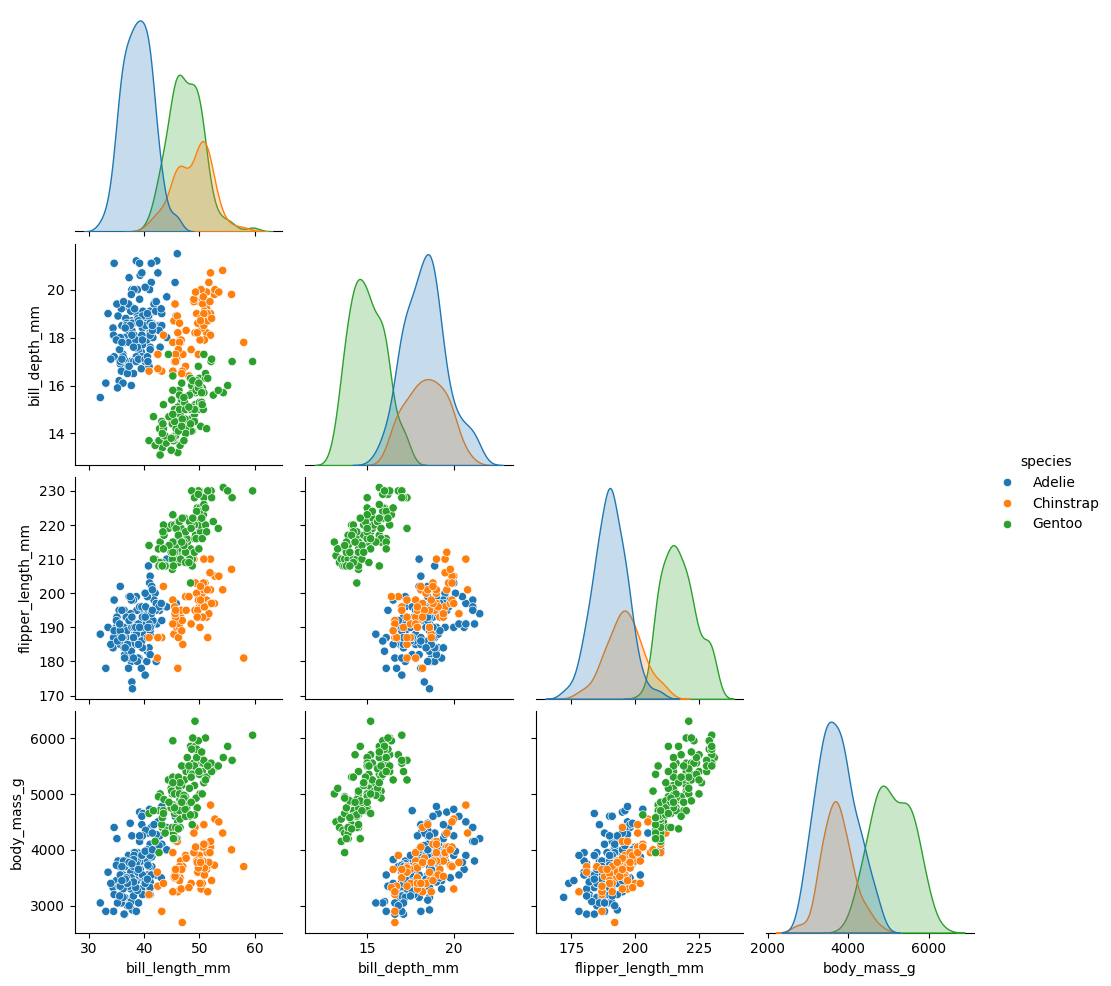

In [10]:
sns.pairplot(penguins, hue="species", vars=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"], corner=True)
plt.savefig("ec_penguins_pairplot.png", dpi=120, bbox_inches="tight")
plt.show()

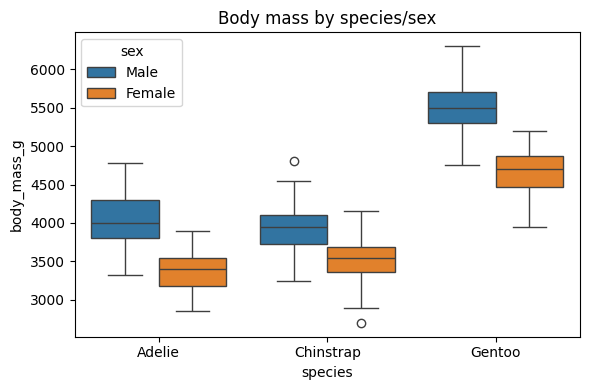

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=penguins, x="species", y="body_mass_g", hue="sex")
plt.title("Body mass by species/sex")
plt.tight_layout()
plt.savefig("ec_penguins_box.png", dpi=120)
plt.show()

## NumPy: vectorization & broadcasting

In [12]:
arr = np.arange(12).reshape(3,4)
print('arr:\n', arr)
print('broadcast add column means:\n', arr + arr.mean(axis=0))


arr:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
broadcast add column means:
 [[ 4.  6.  8. 10.]
 [ 8. 10. 12. 14.]
 [12. 14. 16. 18.]]


In [13]:
# elementwise operations & boolean masking
arr2 = np.random.rand(3,4)
mask = arr2 > 0.5
print('mask:\n', mask)
print('masked values:', arr2[mask])


mask:
 [[ True  True  True  True]
 [False  True  True False]
 [ True  True  True  True]]
masked values: [0.60229227 0.69411845 0.91207435 0.73439229 0.80710453 0.63489966
 0.63700507 0.91995349 0.79409445 0.82778469]


## NumPy: linear algebra

In [14]:
A = np.array([[3,1],[2,4]])
b = np.array([9,8])
solution = np.linalg.solve(A,b)
print("solution to Ax=b:", solution)
print("eigvals:", np.linalg.eigvals(A))

solution to Ax=b: [2.8 0.6]
eigvals: [2. 5.]


## NumPy: random sampling & stats

-0.028891550995946837 0.988722355396508


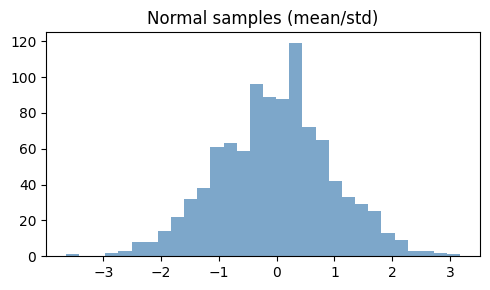

In [15]:
rng = np.random.default_rng(42)
samples = rng.normal(loc=0, scale=1, size=1000)
print(samples.mean(), samples.std())
plt.figure(figsize=(5,3))
plt.hist(samples, bins=30, alpha=0.7, color="steelblue")
plt.title("Normal samples (mean/std)")
plt.tight_layout()
plt.savefig("ec_numpy_hist.png", dpi=120)
plt.show()

## Cleanup helper to show saved plots

In [16]:
import os
print("Saved figures:", [f for f in os.listdir(".") if f.startswith("ec_")])

Saved figures: ['ec_numpy_hist.png', 'ec_penguins_pairplot.png', 'ec_penguins_box.png']
